In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
import pandas as pd
###  CODE FOR QUESTION 1 OF THE PROBLEM STATEMENT   #####
#<<<<<<<<<<<<---------------------------------------->>>>>>>>>>>>>>>>>


def scrape_table(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    table = soup.find('table', class_='data-table')
    rows = table.find_all('tr')[1:]  # here we are extracting eacg row of the table
    company_data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        company_data.append(cols)
    return company_data
    
data_page=scrape_table('https://www.screener.in/company/NIFTY/?page=1')
columns=[ "S No","Company name","PE", "EPS", "52 Week High/Low", "Lower" , "Upper", "LTP", "Market Cap"   
 ,"Volume", "% Change"]
df = pd.DataFrame(data_page, columns=columns)
df=df.drop([15,26])
df.reset_index(drop=True, inplace=True)

tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 
    'INFY.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS', 'SBIN.NS', 
    'BHARTIARTL.NS', 'KOTAKBANK.NS', 'ITC.NS', 
    'BAJFINANCE.NS', 'ADANIENT.NS', 'ADANIPORTS.NS', 
    'HCLTECH.NS', 'LT.NS', 'AXISBANK.NS', 
    'ASIANPAINT.NS', 'SUNPHARMA.NS', 'NESTLEIND.NS', 
    'M&M.NS', 'ULTRACEMCO.NS', 'POWERGRID.NS', 
    'MARUTI.NS', 'TATAMOTORS.NS', 'WIPRO.NS'  
]
df['tickers']=tickers
#print(df)


### ADDING THE RETURN DATA USING YFINANCE LIBRABRY
tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 
    'HINDUNILVR.NS', 'SBIN.NS', 'BHARTIARTL.NS', 'KOTAKBANK.NS', 'ITC.NS',
    'BAJFINANCE.NS', 'ADANIENT.NS', 'ADANIPORTS.NS', 'HCLTECH.NS', 'LT.NS', 
    'AXISBANK.NS', 'ASIANPAINT.NS', 'SUNPHARMA.NS', 'NESTLEIND.NS', 
    'M&M.NS', 'ULTRACEMCO.NS', 'POWERGRID.NS', 'MARUTI.NS', 'TATAMOTORS.NS', 'WIPRO.NS'
]
returns_data = []
for ticker in tickers:
    try:
        stock_data = yf.Ticker(ticker).history(period='5y')
        if stock_data.empty:
            print(f"Error fetching data for {ticker}: No data found")
            continue
        close_prices = stock_data['Close']
        six_month_return = (close_prices.iloc[-1] - close_prices.iloc[-126]) / close_prices.iloc[-126] * 100  # 6-month return
        one_year_return = (close_prices.iloc[-1] - close_prices.iloc[-252]) / close_prices.iloc[-252] * 100  # 1-year return
        five_year_return = (close_prices.iloc[-1] - close_prices.iloc[0]) / close_prices.iloc[0] * 100  # 5-year return
        #now creating a new datafame to have the return table
        returns_data.append({
            'tickers': ticker,
            '6M Return (%)': round(six_month_return, 2),
            '1Y Return (%)': round(one_year_return, 2),
            '5Y Return (%)': round(five_year_return, 2),
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
returns_df = pd.DataFrame(returns_data)
merged_df = pd.merge(df, returns_df, on='tickers', how='outer')
print(merged_df)

   S No      Company name        PE    EPS 52 Week High/Low Lower     Upper  \
0   12.     Bajaj Finance   7182.80  28.92        444612.78  0.50   4013.74   
1   13.  Sun Pharma.Inds.   1813.45  38.83        435107.40  0.74   3037.33   
2   17.     Maruti Suzuki  11272.55  25.28        354411.87  1.11   3102.50   
3   16.         Axis Bank   1148.15  12.72        355330.48  0.09   7435.66   
4   11.  HCL Technologies   1968.80  31.75        534266.38  2.64   4237.00   
5    8.               ITC    470.00  28.61        588008.16  2.93   5054.43   
6   14.             M & M   3081.40  32.29        383180.97  0.68   3361.06   
7    3.         HDFC Bank   1871.75  20.68       1430928.71  1.04  18627.44   
8    6.           Infosys   1999.70  30.81        830324.82  1.90   6516.00   
9    5.        ICICI Bank   1344.90  20.04        949165.22  0.74  13905.99   
10   4.     Bharti Airtel   1681.75  71.04       1007452.46  0.48   4153.40   
11  10.   Larsen & Toubro   3887.00  39.70        53

[*********************100%***********************]  1 of 1 completed


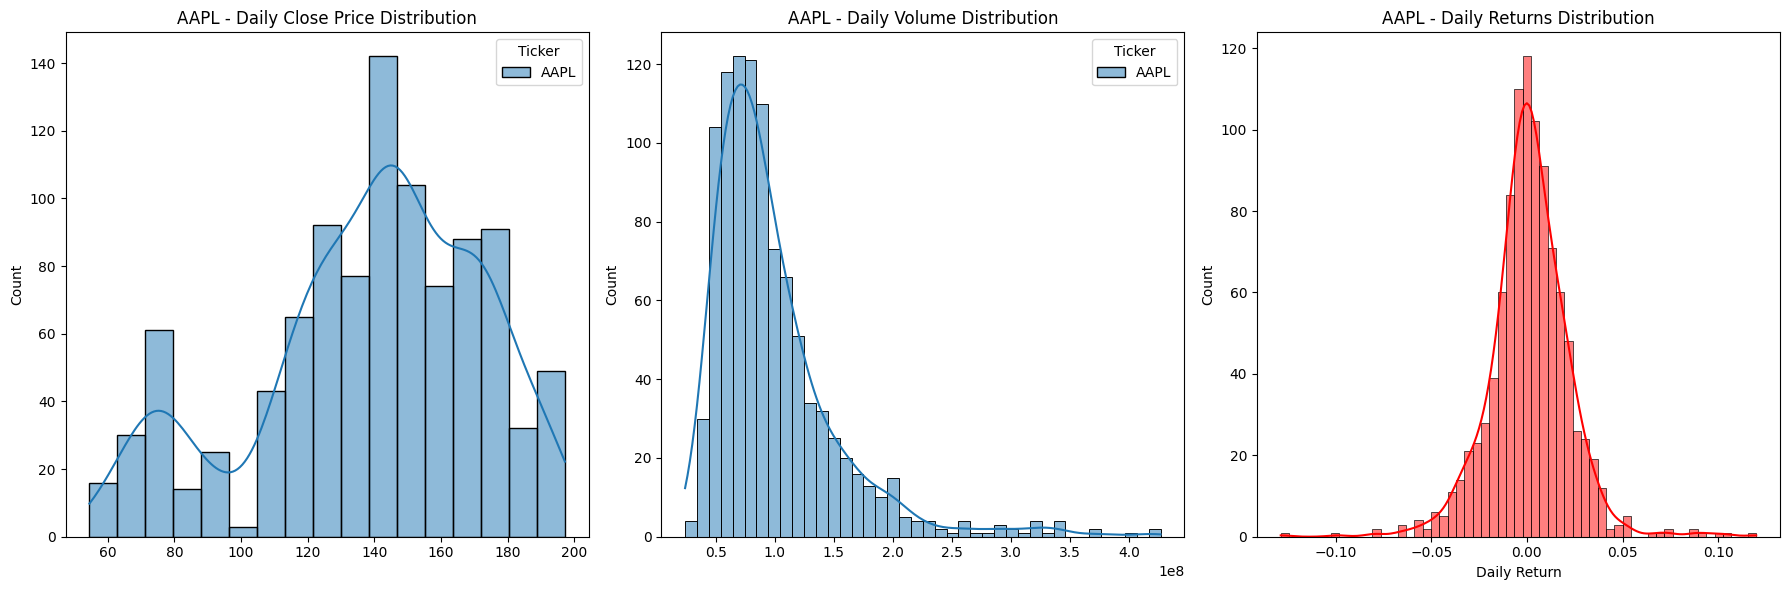

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# CODE FOR QUESTION NUMBER 2 OF PROBLEM STATEMENT 
#   <<<<<<<<<----------------------------------->>>>>>>>



stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2020-01-01', end='2023-12-31')
data['Daily Return'] = data['Adj Close'].pct_change()
#z score calculation
z_score_close = stats.zscore(data['Adj Close'].dropna())
z_score_volume = stats.zscore(data['Volume'].dropna())
#t score calculation
t_statistic, p_value = stats.ttest_1samp(data['Daily Return'].dropna(), 0)
# t interval calculation
confidence_level = 0.95
sample_mean = data['Daily Return'].dropna().mean()
sample_std = data['Daily Return'].dropna().std()
sample_size = len(data['Daily Return'].dropna())
#margin of error calculation
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_critical * (sample_std / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['Adj Close'], kde=True, color='blue')
plt.title(f'{stock_symbol} - Daily Close Price Distribution')


plt.subplot(1, 3, 2)
sns.histplot(data['Volume'], kde=True, color='green')
plt.title(f'{stock_symbol} - Daily Volume Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Daily Return'].dropna(), kde=True, color='red')
plt.title(f'{stock_symbol} - Daily Returns Distribution')


plt.tight_layout()
plt.show()


--- ADF Test for RELIANCE.NS ---
ADF Statistic: -1.9957154758016893
p-value: 0.28845486787638486
The series is likely non-stationary.
KPSS Statistic: 0.4413628553152943
p-value: 0.059326355467545576
The series is likely stationary.

--- ADF Test for TCS.NS ---
ADF Statistic: -1.895194298487245
p-value: 0.3343252308046572
The series is likely non-stationary.
KPSS Statistic: 1.3515641817460546
p-value: 0.01
The series is likely non-stationary.


C:\Users\adity\AppData\Local\Temp\ipykernel_58320\3138897982.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


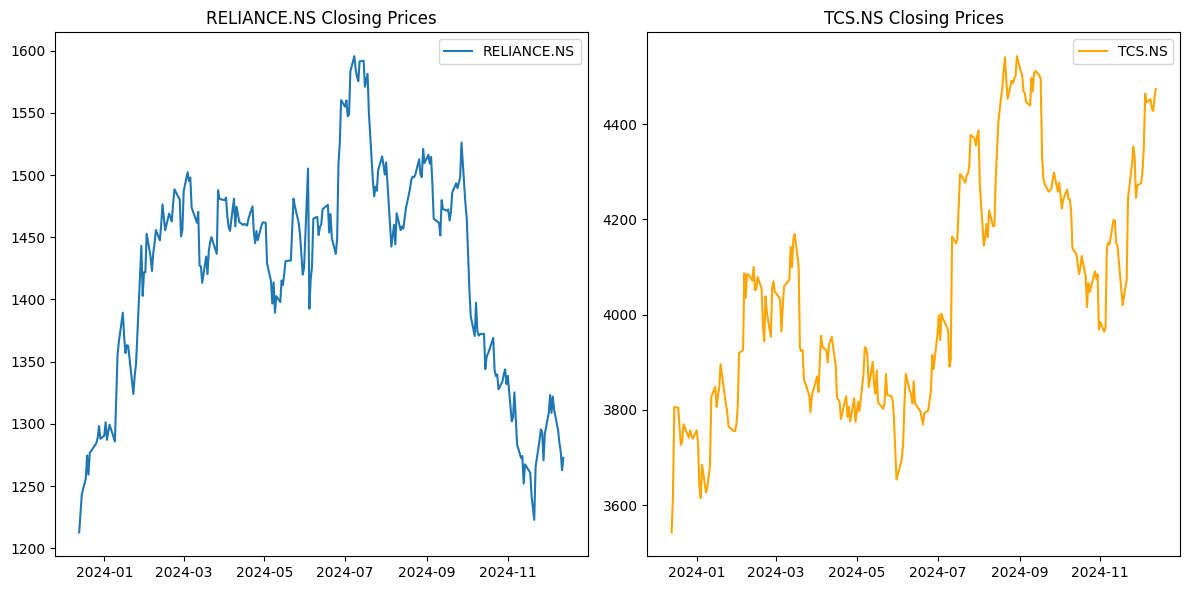

In [4]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
# THIS IS THE CODE FOR BONUS QUESTION OF THE PROBLEM STATEMENT 
#<<<<<<<<<---------------------------------------->>>>>>>>
stock1 = yf.Ticker('RELIANCE.NS').history(period='1y')
stock2 = yf.Ticker('TCS.NS').history(period='1y')

def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is likely stationary.")
    else:
        print("The series is likely non-stationary.")
        
def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print(f"KPSS Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is likely non-stationary.")
    else:
        print("The series is likely stationary.")

print("\n--- ADF Test for RELIANCE.NS ---")
adf_test(stock1['Close'])
kpss_test(stock1['Close'])

print("\n--- ADF Test for TCS.NS ---")
adf_test(stock2['Close'])
kpss_test(stock2['Close'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(stock1['Close'], label='RELIANCE.NS')
plt.title('RELIANCE.NS Closing Prices')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stock2['Close'], label='TCS.NS', color='orange')
plt.title('TCS.NS Closing Prices')
plt.legend()

plt.tight_layout()
plt.show()
